# The Santa Challenge

Dear MD4SG,

We have a message from  Santa asking us to help solve a data-related problem. The only thing we know is that the problem is rather simple, but requires a bit of thinking. As always, Santa made a mysterious message for us to decrypt it. We'll try to decrypt it with you! Here is the message:

> "In the dataset I give, try to predict `y` based on `X`. Instead of going deep, try something **simple** and sweet. For the dataset at hand, being accurate is not an aim. Since accuracy is not the thing you seek, data visualization should do the trick! I hope this task brings you pleasure, but make sure to share the treasure! And one more thing, don't worry you'll overfit!"

## Problem and Data Understanding

As we have the data attached, we should load them and see what we have. To read the data, we need the `pandas` package and the function `read_csv`.

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df = pd.read_csv('santa_challenge.csv')
df.head()

,y,x1,x2,x3,x4,x5,x6
0,0.74,0.09,0.11,0.04,0.15,0.01,-0.15
1,-2.02,0.03,-0.10,-0.03,0.23,-0.02,-0.16
2,-0.77,0.02,-0.06,0.05,0.24,0.02,-0.08
3,-0.53,-0.03,-0.34,0.04,-0.10,-0.04,0.08
4,0.76,0.00,-0.21,0.15,0.20,0.11,-0.62


As Santa has suggested, we have `y` and `X`'s. More specifically, we have six `X`'s and a single `y`. A brief inspection of the top five rows is telling us that all the attributes are numerical. Consequently, the predictive problem we're trying to solve is a regression. 

However, it would be nice to see descriptive statistics of the data at hand. 

In [ ]:
df.describe()

,y,x1,x2,x3,x4,x5,x6
count,1035.00,1035.00,1035.00,1035.00,1035.00,1035.00,1035.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.20,0.06,0.19,0.15,0.26,0.09,0.57
min,-3.44,-0.22,-0.60,-0.51,-0.86,-0.31,-1.66
25%,-0.81,-0.04,-0.12,-0.10,-0.16,-0.06,-0.38
50%,0.13,0.00,0.00,-0.01,-0.01,-0.00,-0.01
75%,0.88,0.04,0.13,0.10,0.17,0.05,0.37
max,2.50,0.21,0.62,0.44,0.86,0.25,2.00


Hmmm... all the attributes are centered around zero, with a standard deviation mostly between zero and one. Santa made sure we don't know what the task is, but we are determined to find and share the treasure!

The output attribute `y` is "wider" than input attributes in the sense that values are between -3.44 and 2.50. Perhaps there is something with that! And... Santa said that data visualization should do the trick. Let us plot the data. Maybe we can find something out!

We can start with the Box plot. Maybe outliers can tell us something about the data at hand.

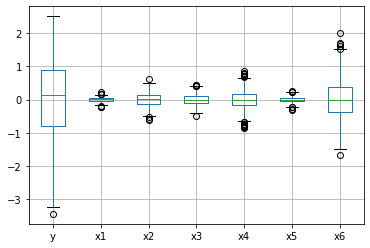

In [ ]:
import matplotlib.pyplot as plt

df.boxplot()

Literally, boxplots are not containing the information we seek. We can see some outliers, but we think it is there to misguide us in the mission we explore. Let us look at a scatter plot, perhaps we can understand the data better and find the treasure Santa speaks about.

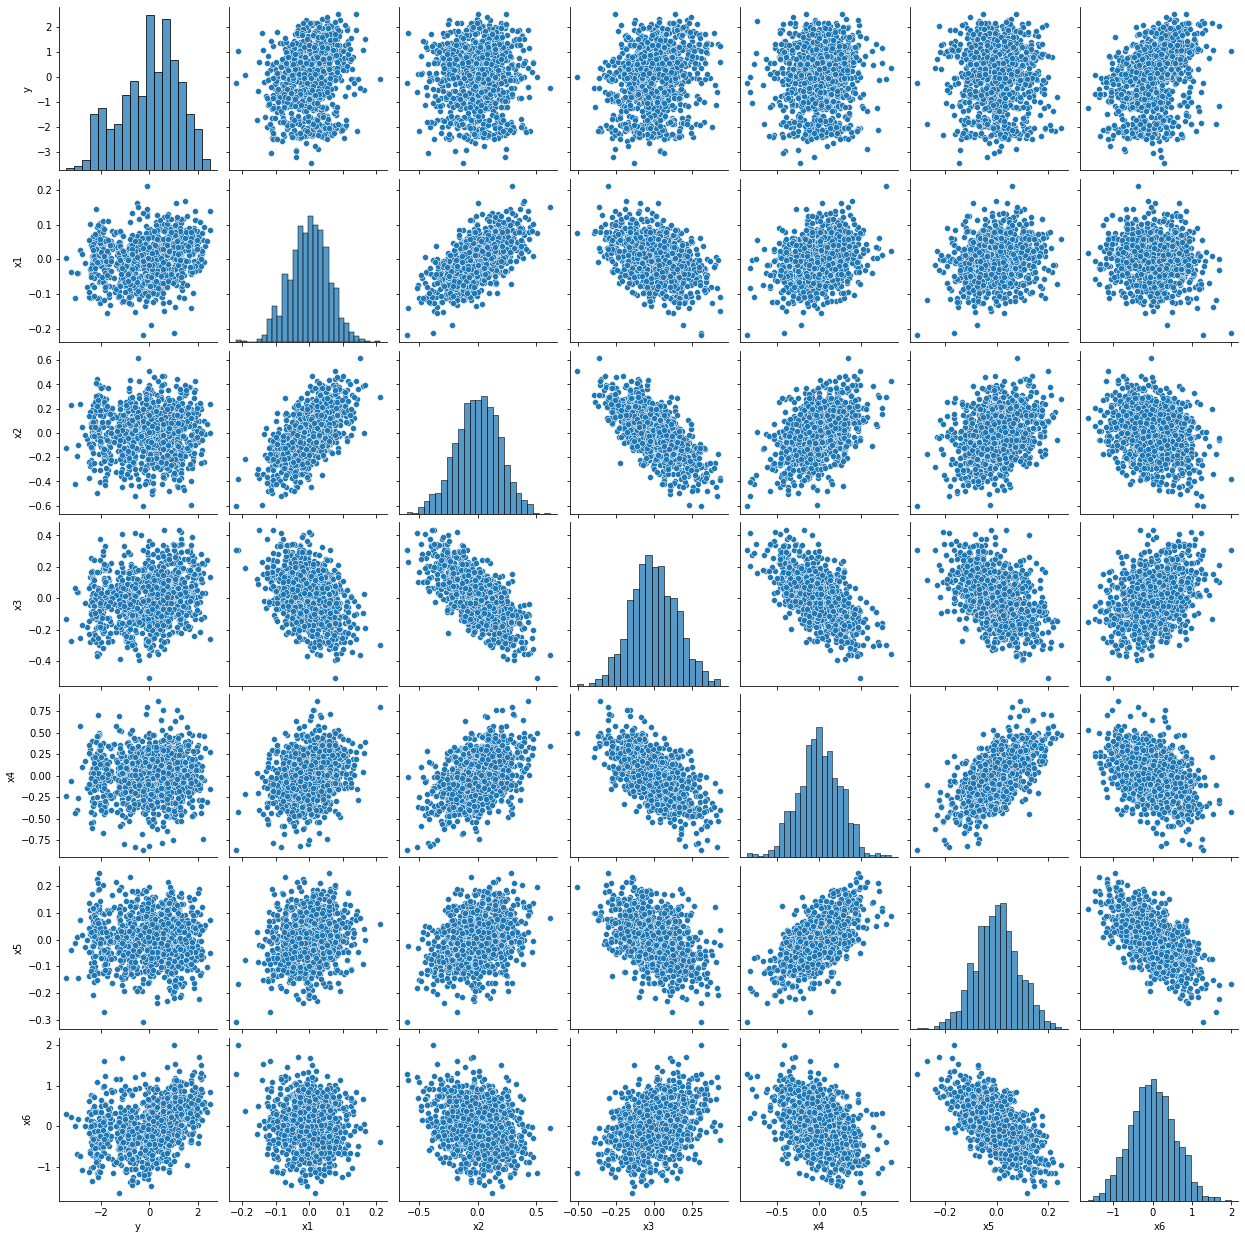

In [ ]:
import seaborn as sns

sns.pairplot(df)

What is interesting to see is that all input attributes seem to follow a normal distribution, and only the output attribute is a bit different. Some input attributes are correlated (for example `x6` and `x5` are negatively correlated), but besides possibly having a multicollinearity issue, not a big deal. Since this is a prediction task, accuracy should be good (but an interpretation of the predictive model can suffer).

Interestingly, input attributes do not look to be correlated with the output attribute! All visualizations in the first row (or column) look like noise. Can we actually even predict the output attribute? Santa definitely invested a lot of effort to hide the treasure in the data. 

## Modelling and Evaluation

The data understanding didn't help us understand the problem better. We don't know what are the input attributes, or what is the output. The only thing we know is that we are supposed to solve the regression problem. Perhaps, we should learn a couple of models and evaluate how good they are.

Let us first divide the dataset to input attributes `X` and output attribute `y`, and after that let us learn several regression models. We can use `sklearn` and import several regressors. We can start strong with Neural Networks, and after that use some of the ensemble algorithms, such as Gradient Boosted Trees and Random Forest, and calculate mean absolute error and mean sqaure error. We are going to listen to the Santa here, we are not going to worry if we overfit.

In [ ]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
model = MLPRegressor().fit(X, y)
y_pred = model.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'The error is: MAE = {mae} and MSE = {mse}')

The error is: MAE = 0.7714860303380738 and MSE = 0.9365440077978077


The error of the Neural network is rather large! On the between -3.5 and +2.5, we have mean absolute error of 0.75. Perhaps going deeper would do the trick!

In [ ]:
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 50, 20)).fit(X, y)
y_pred = model_mlp.predict(X)

In [ ]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'The error is: MAE = {mae} and MSE = {mse}')

The error is: MAE = 0.729091052953469 and MSE = 0.8069880759735133


We are definitely better at prediction, but it seems we are not going in the direction Santa wanted us to go. 

Let us see how other algorihtms perform on this task as well.

In [ ]:
model_gbt = GradientBoostingRegressor().fit(X, y)
y_pred = model_gbt.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'The error is: MAE = {mae} and MSE = {mse}')

The error is: MAE = 0.6209567410190276 and MSE = 0.6123298083865834


In [ ]:
model_gbt = RandomForestRegressor().fit(X, y)
y_pred = model_gbt.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'The error is: MAE = {mae} and MSE = {mse}')

The error is: MAE = 0.3047202335333334 and MSE = 0.14846030827995715


Gradient Boosted Trees and Random Forest are bit better, but still an error is high for Santa to be satisfied with us. We still haven't found and shared the treasure.


## Final Attempt

Let us decompose the message once again, and bring this treasure hunt to the end!

> "In the dataset I give, try to predict `y` based on `X`. 

This is by definition a regression task, we got that right. I hope we all agree (otherwise we will have a "fight")!

> Instead of going deep, try something **simple** and sweet. 

All the algorithms we tried are somewhat complex. Instead of going deep, perhaps we can try something simple... like **Linear Regression**. That should do the trick!

> For the dataset at hand, being accurate is not an aim. Since accuracy is not the thing you seek, data visualization should do the trick! 

The goal is obviously not to be correct, but perhaps to understand where we make an error. Of course, instead of wanting to be correct all the time, reflect on your mistakes, and make yourself and close ones happier!

Let us learn the Linear Regression model, and plot the residual plot (`y` and `y - y_pred`).

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True).fit(X, y)
y_pred = model.predict(X)

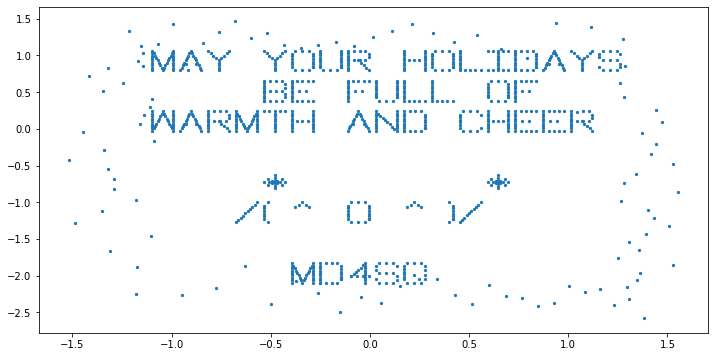

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter(y_pred, y - y_pred, s=5)